In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import urllib.request
%matplotlib inline

ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt

In [2]:
uri = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt'
with urllib.request.urlopen(uri) as response:
    lines = response.read().decode().split("\n")
    stream = io.StringIO("\n".join(filter(lambda x: not(x.startswith('#')), lines)))

df = pd.read_fwf(
    stream, header=None, usecols=[0, 1, 2, 4, 5],
    names=['year', 'month', 'day', 'value', 'ndays'],
    parse_dates={'timestamp': ['year', 'month', 'day']},
    index_col='timestamp',
    na_values=[-999.99]
)
df.tail()

,value,ndays
timestamp,,
2018-10-14,406.00,6
2018-10-21,406.62,7
2018-10-28,406.48,6
2018-11-04,406.99,5
2018-11-11,408.72,5


In [3]:
AQ = pd.read_pickle('CO2.df')
AQ.head()

measurandkey           CO2              
sitekey             41R002 41R012 41WOL1
channelid              165    174    196
timevalue                               
2010-01-01 00:00:00  410.0  407.0  395.0
2010-01-01 00:30:00  410.0  407.0  395.0
2010-01-01 01:00:00  411.0  407.0  395.0
2010-01-01 01:30:00  409.0  407.0  395.0
2010-01-01 02:00:00  408.0  407.0  394.0

(2036, 2558)

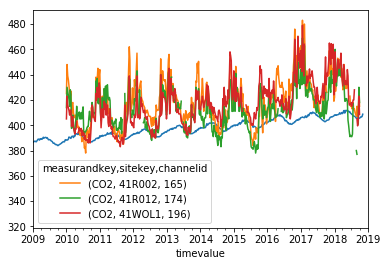

In [4]:
axe = df['value'].plot()
AQ.resample('1W').median().plot(ax=axe)
axe.set_xlim(['2009-01-01','2019-01-01'])